Hallie's Notebook

In this notebook, I analyzed the dataset playgrounds. I am measuring bestness by the number of playgrounds a neighborhood has. The more playgrounds a neighborhood has, the more people can be physically active, reduce stress, and improve community connection. Having those three things will improve overall happiness, and the happiness of a neighborhood definitely plays a part in terms of bestness.

To read the datasheet, I first used the import pandas function as pd so that I can have all of its functions in my notebook.

In [2]:
import pandas as pd

%matplotlib inline

In [3]:
p_data = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367")
p_data.head()

,_id,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,2,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,3,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,4,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,5,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064


In [ ]:
I then had it read the file as p_data.

In [4]:
p_data.groupby('neighborhood').head()

,_id,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,2,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,3,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,4,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,5,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,121,1199980206,Phillips Lower Playground,NaN,NaN,NaN,NaN,NaN,Carrick,4,29,42003290400,3,29,3,4-23,40.388144,-79.990309
121,122,2108783707,Duncan Park Playground,NaN,NaN,Duncan Park,DUNCAN ST,NaN,Upper Lawrenceville,7,10,42003101100,2,10,2,3-5,40.480246,-79.948461
122,123,675610013,McKinley Upper Playground,NaN,NaN,McKinley Park,MICHIGAN ST,NaN,Beltzhoover,4,18,42003562400,5,18,3,4-16,40.415730,-80.002950
123,155,1683700344,Liberty Green Playground,NaN,NaN,Liberty Green Park,NaN,NaN,East Liberty,9,11,42003111500,2,11,5,3-10,40.462951,-79.919097


There's not much we can do with this information, so I decided to group it by neighborhood and see how frequently it popped up and ranked them from highest to lowest.

In [5]:


counts = (
    p_data[p_data["neighborhood"].str.lower() != "pittsburgh"]["neighborhood"]
    .value_counts()
    .reset_index()
)

counts.columns = ["neighborhood", "count"]

print(counts)

           neighborhood  count
0   Squirrel Hill South      8
1             Beechview      5
2     South Side Slopes      5
3         Highland Park      4
4              Sheraden      4
..                  ...    ...
63             West End      1
64          Polish Hill      1
65   Point Breeze North      1
66  Squirrel Hill North      1
67       East Allegheny      1

[68 rows x 2 columns]


In [8]:
top10 = (p_data.groupby("neighborhood").size().reset_index(name="playground").sort_values("playground", ascending=False).head(10))

In [9]:
top10.head(10)

,neighborhood,playground
56,Squirrel Hill South,8
4,Beechview,5
52,South Side Slopes,5
0,Allegheny Center,4
29,Highland Park,4
49,Sheraden,4
5,Beltzhoover,4
63,Upper Lawrenceville,3
40,Mount Washington,3
28,Hazelwood,3


In [10]:
top10 = (p_data.groupby("neighborhood").size().reset_index(name="playground").sort_values("playground", ascending=True).head(10))

In [11]:
top10.head(10)

,neighborhood,playground
1,Allentown,1
2,Banksville,1
3,Bedford Dwellings,1
7,Bluff,1
12,Central Lawrenceville,1
14,Central Oakland,1
8,Bon Air,1
31,Homewood West,1
24,Fineview,1
27,Hays,1


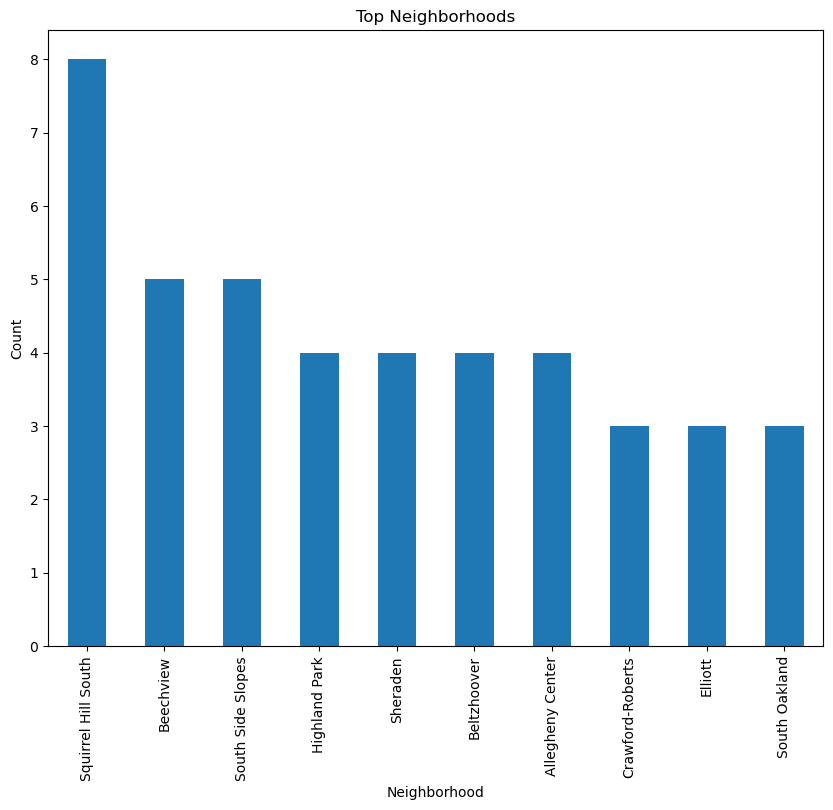

In [12]:
import matplotlib.pyplot as plt

counts = p_data["neighborhood"].value_counts()

top10 = counts.head(10)

plt.figure(figsize=(10, 8))
top10.plot(kind="bar")
plt.title("Top Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.show()


PLaygrounds are like the hidden gems of Pittsburgh and show which neighborhoods have a spark of life and community engagement. They offer recreational activities and venues for gatherings that can contribute to the people's well-being. By examining how many playgrounds are in a neighborhood, you can see which neighborhood prioritizes fun and relaxation for its residents. Which means more playgrounds, makes happier residents, which makes a neighborhood better.

Final Conclusion:

Playgrounds are like the hidden gems of Pittsburgh and show which neighborhoods have a spark of life and community engagement. They're not just a set of swings and slides, they offer recreational/outdoor activitiesfor kids and places where families can gather which can contribute to the people's well-being. By examining how many playgrounds are in a neighborhood, you can see which neighborhood prioritizes fun and relaxation for its residents. Which means more playgrounds, makes happier residents, which makes a neighborhood better. I analyzed the dataset and had it count up the number of times they appeared in the dataset and had them ranked from highest to lowest, and took the top ten. From the dataset, Squirrel Hill South was the best neighborhood, and Allentown was the loser of this set. I’ve heard a lot of good things about Squirrel Hill, so I'm not too surprised that it would be considered the "best" in this dataset.